In [2]:
!pip install eep153_tools
!pip install python_gnupg

from eep153_tools.sheets import decrypt_credentials
#decrypt_credentials('../students.json.gpg')

In [3]:
import matplotlib.pyplot as plt
from  scipy.optimize import linprog as lp
import numpy as np
import warnings
import pandas as pd

from eep153_tools.sheets import read_sheets
SHEET = [("https://docs.google.com/spreadsheets/d/1aI1wYbJ1LY-en_B9wt1kHJ0CB9Hh6QibausCN5l6FlA/edit?usp=sharing","Form Responses 1")]

In [4]:
df_survey = read_sheets(SHEET[0][0])[SHEET[0][1]]

Key available for students@eep153.iam.gserviceaccount.com.


In [5]:
df_survey

,Timestamp,Score,What is your preferred diet?,Where do you grocery shop the most in Berkeley?,How much do you spend on an average grocery-shopping trip?,How many times per week do you go grocery shopping?
0,2/28/2022 17:22:24,NaN,Omnivorous,Berkeley Bowl,$ 100 +,1.0
1,2/28/2022 17:22:29,NaN,Omnivorous,Trader Joe's,$ 0 - 20,1.0
2,2/28/2022 17:22:46,NaN,Vegetarian,Trader Joe's,$ 60 - 80,1.0
3,2/28/2022 17:22:51,NaN,Omnivorous,Trader Joe's,$ 40 - 60,1.0
4,2/28/2022 17:23:42,NaN,Omnivorous,Trader Joe's,$ 100 +,1.0
...,...,...,...,...,...,...
81,3/1/2022 16:01:43,NaN,Pescatarian,Safeway,$ 20 - 40,1.0
82,3/1/2022 20:49:14,NaN,Omnivorous,Trader Joe's,$ 40 - 60,2.0
83,3/1/2022 22:26:14,NaN,Omnivorous,Trader Joe's,$ 80 - 100,1.0
84,3/2/2022 18:35:35,NaN,Omnivorous,Trader Joe's,$ 80 - 100,1.0


In [6]:
def change_df_col_to_int(df, col):
   # df[col] = df[col].dropna()
    df[col] = df[col].str.replace('$', '')
    df[col] = df[col].astype(float)
    return df

In [7]:
#change_df_col_to_int(df_survey, 'How much do you spend on an average grocery-shopping trip?')
#Could not get this code to run

In [8]:
df_survey['How many times per week do you go grocery shopping?'].value_counts()

1.0    77
2.0     5
4.0     2
3.0     1
Name: How many times per week do you go grocery shopping?, dtype: int64

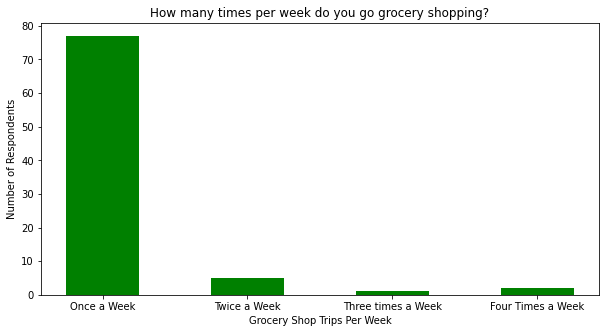

In [9]:
GroceryShopping_dict = {'Once a Week':77, 'Twice a Week':5, 'Three times a Week':1, 'Four Times a Week': 2}
frequency_of_shopping = list(GroceryShopping_dict.keys())
values = list(GroceryShopping_dict.values())
fig_GroceryShopping_Freq = plt.figure(figsize = (10, 5))

# Bar plot
plt.bar(frequency_of_shopping, values, color ='green',
        width = 0.5)
plt.xlabel("Grocery Shop Trips Per Week")
plt.ylabel("Number of Respondents")
plt.title("How many times per week do you go grocery shopping?")
plt.show()

## Approximate Spending Per Grocery Run

In [14]:
df_survey['How much do you spend on an average grocery-shopping trip?'].value_counts()

$ 20 - 40     33
$ 40 - 60     25
$ 60 - 80     12
$ 80 - 100     7
$ 100 +        5
$ 0 - 20       3
               1
Name: How much do you spend on an average grocery-shopping trip?, dtype: int64

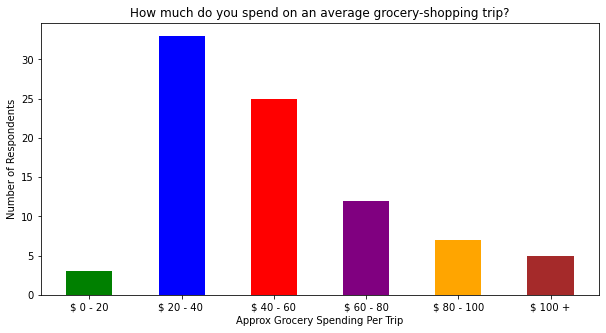

In [21]:
GrocerySpending_dict = {'$ 0 - 20':3, '$ 20 - 40 ':33, '$ 40 - 60':25, '$ 60 - 80':12, '$ 80 - 100':7, '$ 100 +':5}
spending_per_shopping = list(GrocerySpending_dict.keys())
values = list(GrocerySpending_dict.values())
fig_GrocerySpending_Per = plt.figure(figsize = (10, 5))

# Bar plot
plt.bar(spending_per_shopping, values, color = ['green','blue', 'red', 'purple', 'orange', 'brown']
        , width = 0.5)

plt.xlabel("Approx Grocery Spending Per Trip")
plt.ylabel("Number of Respondents")
plt.title("How much do you spend on an average grocery-shopping trip?")
plt.show()

## Grocery Store Preferences



In [10]:
df_survey['Where do you grocery shop the most in Berkeley?'].value_counts()

Trader Joe's     59
Safeway          14
Berkeley Bowl    11
Whole Foods       2
Name: Where do you grocery shop the most in Berkeley?, dtype: int64

In [12]:
tj_percent = (59/86)*100
safeway_percent = (14/86)*100
bb_percent= (11/86)*100
wf_percent = (2/86)*100


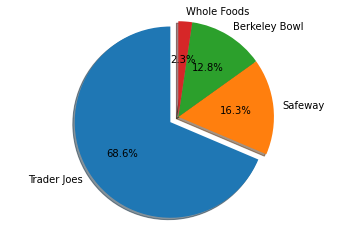

In [13]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Trader Joes', 'Safeway', 'Berkeley Bowl', 'Whole Foods'
sizes = [tj_percent, safeway_percent, bb_percent, wf_percent]
explode = (0.1, 0, 0, 0)  # only "explode" the 1st slice Trader Joes

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()